In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, ZeroPadding2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
# Chargement du dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Forme originale X_train: {X_train.shape}")
print(f"Forme originale y_train: {y_train.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Forme originale X_train: (60000, 28, 28)
Forme originale y_train: (60000,)


In [ ]:
# Normalisation [0, 255] → [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# Conversion one-hot encoding
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

In [ ]:
# Redimensionnement 28×28 → 32×32 avec padding
def resize_to_32x32(images):
    """Redimensionne les images 28×28 en 32×32 avec padding"""
    resized = []
    for img in images:
        # Créer une image 32×32 remplie de zéros (fond noir)
        padded = np.zeros((32, 32), dtype=np.float32)
        # Placer l'image originale au centre
        padded[2:30, 2:30] = img  # 32-28=4 → padding de 2 pixels de chaque côté
        resized.append(padded)
    return np.array(resized)

In [ ]:
# Application du redimensionnement
X_train_32 = resize_to_32x32(X_train)
X_test_32 = resize_to_32x32(X_test)

In [ ]:
print(f"\nAprès redimensionnement 28×28 → 32×32:")
print(f"X_train_32: {X_train_32.shape}")  # (60000, 32, 32)
print(f"X_test_32: {X_test_32.shape}")    # (10000, 32, 32)


Après redimensionnement 28×28 → 32×32:
X_train_32: (60000, 32, 32)
X_test_32: (10000, 32, 32)


In [ ]:
# Conversion en 3 canaux (comme l'exercice 1)
X_train_32x32x3 = np.repeat(X_train_32[..., np.newaxis], 3, axis=-1)
X_test_32x32x3 = np.repeat(X_test_32[..., np.newaxis], 3, axis=-1)

In [ ]:
print(f"\nAprès conversion 3 canaux:")
print(f"X_train_32x32x3: {X_train_32x32x3.shape}")  # (60000, 32, 32, 3)
print(f"X_test_32x32x3: {X_test_32x32x3.shape}")    # (10000, 32, 32, 3)


Après conversion 3 canaux:
X_train_32x32x3: (60000, 32, 32, 3)
X_test_32x32x3: (10000, 32, 32, 3)


In [ ]:
# Visualisation du redimensionnement
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

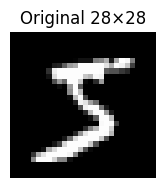

In [ ]:
plt.subplot(1, 3, 1)
plt.imshow(X_train[0], cmap='gray')
plt.title('Original 28×28')
plt.axis('off')

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

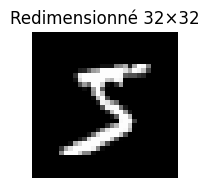

In [ ]:
plt.subplot(1, 3, 2)
plt.imshow(X_train_32[0], cmap='gray')
plt.title('Redimensionné 32×32')
plt.axis('off')

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

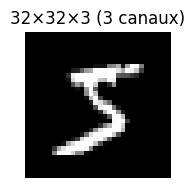

In [ ]:
plt.subplot(1, 3, 3)
plt.imshow(X_train_32x32x3[0])
plt.title('32×32×3 (3 canaux)')
plt.axis('off')

In [ ]:
plt.suptitle('Redimensionnement MNIST 28×28 → 32×32×3', fontsize=14)
plt.tight_layout()
plt.savefig('resizing_process.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
print("\n=== CONCEPTION DU MODÈLE CNN ===")


=== CONCEPTION DU MODÈLE CNN ===


In [ ]:
model = Sequential()

In [ ]:
# Couche 1: Conv 5×5 → 28×28×32 (comme exercice mais avec 32 filtres au lieu de 8)
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))  # Conv1
# Sortie: (32-5)/1 + 1 = 28×28×32

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(MaxPooling2D((2, 2)))  # Pool1 → 14×14×32

In [ ]:
# Couche 2: Conv 5×5 → 10×10×64
model.add(Conv2D(64, (5, 5), activation='relu'))  # Conv2
# Sortie: (14-5)/1 + 1 = 10×10×64

In [ ]:
model.add(MaxPooling2D((2, 2)))  # Pool2 → 5×5×64

In [ ]:
# Couche 3: Conv 5×5 → 1×1×64
model.add(Conv2D(64, (5, 5), activation='relu'))  # Conv3
# Sortie: (5-5)/1 + 1 = 1×1×64

In [ ]:
model.add(Flatten())  # → 64 neurones

In [ ]:
# Couches fully connected
model.add(Dense(100, activation='relu'))  # FC4
model.add(Dense(10, activation='softmax'))  # FC5

In [ ]:
# Compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Affichage de l'architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │         6,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163,670 (639.34 KB)

 Trainable params: 163,670 (639.34 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("\n=== ENTRAÎNEMENT DU MODÈLE ===")


=== ENTRAÎNEMENT DU MODÈLE ===


In [ ]:
history = model.fit(X_train_32x32x3, y_train_categorical,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 92s 210ms/step - accuracy: 0.8517 - loss: 0.4784 - val_accuracy: 0.9877 - val_loss: 0.0467
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 141s 208ms/step - accuracy: 0.9825 - loss: 0.0547 - val_accuracy: 0.9880 - val_loss: 0.0426
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 87s 205ms/step - accuracy: 0.9890 - loss: 0.0355 - val_accuracy: 0.9910 - val_loss: 0.0316
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 88s 208ms/step - accuracy: 0.9921 - loss: 0.0241 - val_accuracy: 0.9912 - val_loss: 0.0324
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 141s 205ms/step - accuracy: 0.9941 - loss: 0.0177 - val_accuracy: 0.9893 - val_loss: 0.0333
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 206ms/step - accuracy: 0.9948 - loss: 0.0148 - val_accuracy: 0.9888 - val_loss: 0.0420
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 207ms/step - accuracy: 0.9956 - loss: 0.0127 - val_accuracy: 0.9913 - val_loss: 0.0307
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 86s 204ms/step - accuracy: 0.9956 - los

In [ ]:
print("\n=== ÉVALUATION ET RÉSULTATS ===")


=== ÉVALUATION ET RÉSULTATS ===


In [ ]:
# Évaluation sur le test set
test_loss, test_accuracy = model.evaluate(X_test_32x32x3, y_test_categorical, verbose=0)
print(f"Accuracy sur le test set: {test_accuracy:.4f}")

Accuracy sur le test set: 0.9918


In [ ]:
# Prédictions
y_pred = model.predict(X_test_32x32x3)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


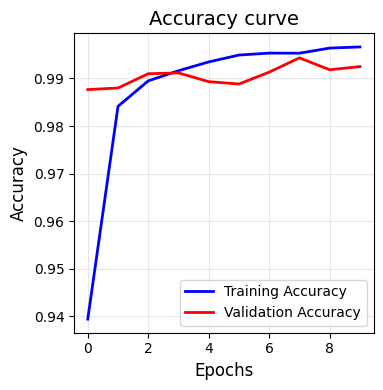

In [ ]:
plt.figure(figsize=(4, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='red')
plt.title('Accuracy curve', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().set_box_aspect(1)  # ✅ Solution magique pour format carré
plt.tight_layout()
plt.savefig('accuracy_curve_carre.png', dpi=300, bbox_inches='tight')
plt.show()

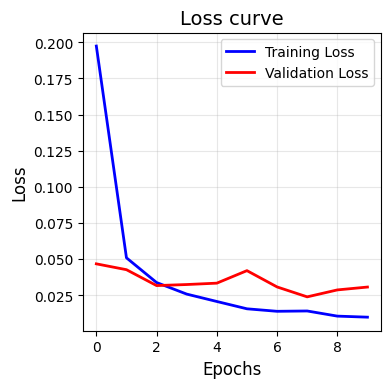

In [ ]:
plt.figure(figsize=(4, 4))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2, color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='red')
plt.title('Loss curve', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().set_box_aspect(1)  # ✅ Solution magique pour format carré
plt.tight_layout()
plt.savefig('loss_curve_carre.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.tight_layout()
plt.savefig('learning_curves_32x32.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
y_pred = model.predict(X_test_32x32x3)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classes)

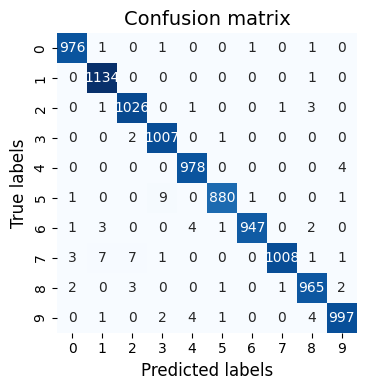

In [ ]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            square=True, annot_kws={"size": 10})
plt.title('Confusion matrix', fontsize=14)
plt.ylabel('True labels', fontsize=12)
plt.xlabel('Predicted labels', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()